In [80]:
# Importing library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import itertools
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# Check library version
print("---Library version---", end = '\n')
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', mpl.__version__, end = '\n\n')

# Setting library
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 122)

mpl.font_manager.fontManager.addfont("C:\\Users\\theer\\Desktop\\Machine Learning\\fonts\\Sarabun-Regular.ttf")
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

# ignore warnings
warnings.filterwarnings('ignore')


print("---Working Directory---", end = '\n\n')
print('Working Directory: ', os.getcwd(), end='\n')
print('List Directory:', os.listdir(os.getcwd()))

---Library version---
pandas version:  2.2.0
numpy version:  1.26.3
seaborn version:  0.13.1
matplotlib version:  3.8.2

---Working Directory---

Working Directory:  C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\Principal Component Analysis
List Directory: ['.ipynb_checkpoints', 'Data', 'doc.txt', 'EC477 - meeting.ipynb', 'EC477 News.ipynb', 'EC477.ipynb', 'Iris dataset.ipynb']


In [4]:
data = pd.read_csv(filepath_or_buffer = r"C:\Users\theer\Desktop\Machine Learning\Machine Learning Model\Unsupervised Learning\Principal Component Analysis\Data\q1112.csv")
data

,Cluster,Area,Windows,Doors,Ceiling_Height,Lighting,Flooring,Wall_Color,Furniture,Room_Layout,...,Noise_Level,Artwork,Electronics,Plants,View,Rug_Type,Wall_Texture,Ceiling_Fixture,Entertainment,Technology
0,Modern,250,5,1,10,3,1,2,3,1,...,1,3,2,2,2,1,1,1,1,1
1,Modern,320,7,2,11,4,1,3,4,1,...,2,3,3,3,3,1,2,1,2,2
2,Modern,280,6,2,10,3,1,2,3,1,...,1,3,2,2,2,2,1,1,2,1
3,Modern,270,5,2,9,3,2,3,4,1,...,1,2,1,2,2,1,1,1,1,1
4,Modern,300,6,2,10,4,1,2,4,1,...,2,3,3,3,3,2,1,1,1,2
5,Minimal,180,3,1,8,2,2,1,2,2,...,2,1,1,2,1,1,2,1,1,1
6,Minimal,190,4,1,8,2,1,2,2,2,...,1,1,1,1,1,2,1,1,1,1
7,Minimal,200,3,1,8,2,2,1,2,2,...,2,1,1,2,1,1,2,1,1,1
8,Minimal,170,3,1,8,2,1,2,2,2,...,1,1,1,1,1,1,2,1,1,1
9,Minimal,220,4,1,8,3,1,1,3,1,...,1,1,1,1,1,2,2,1,1,1


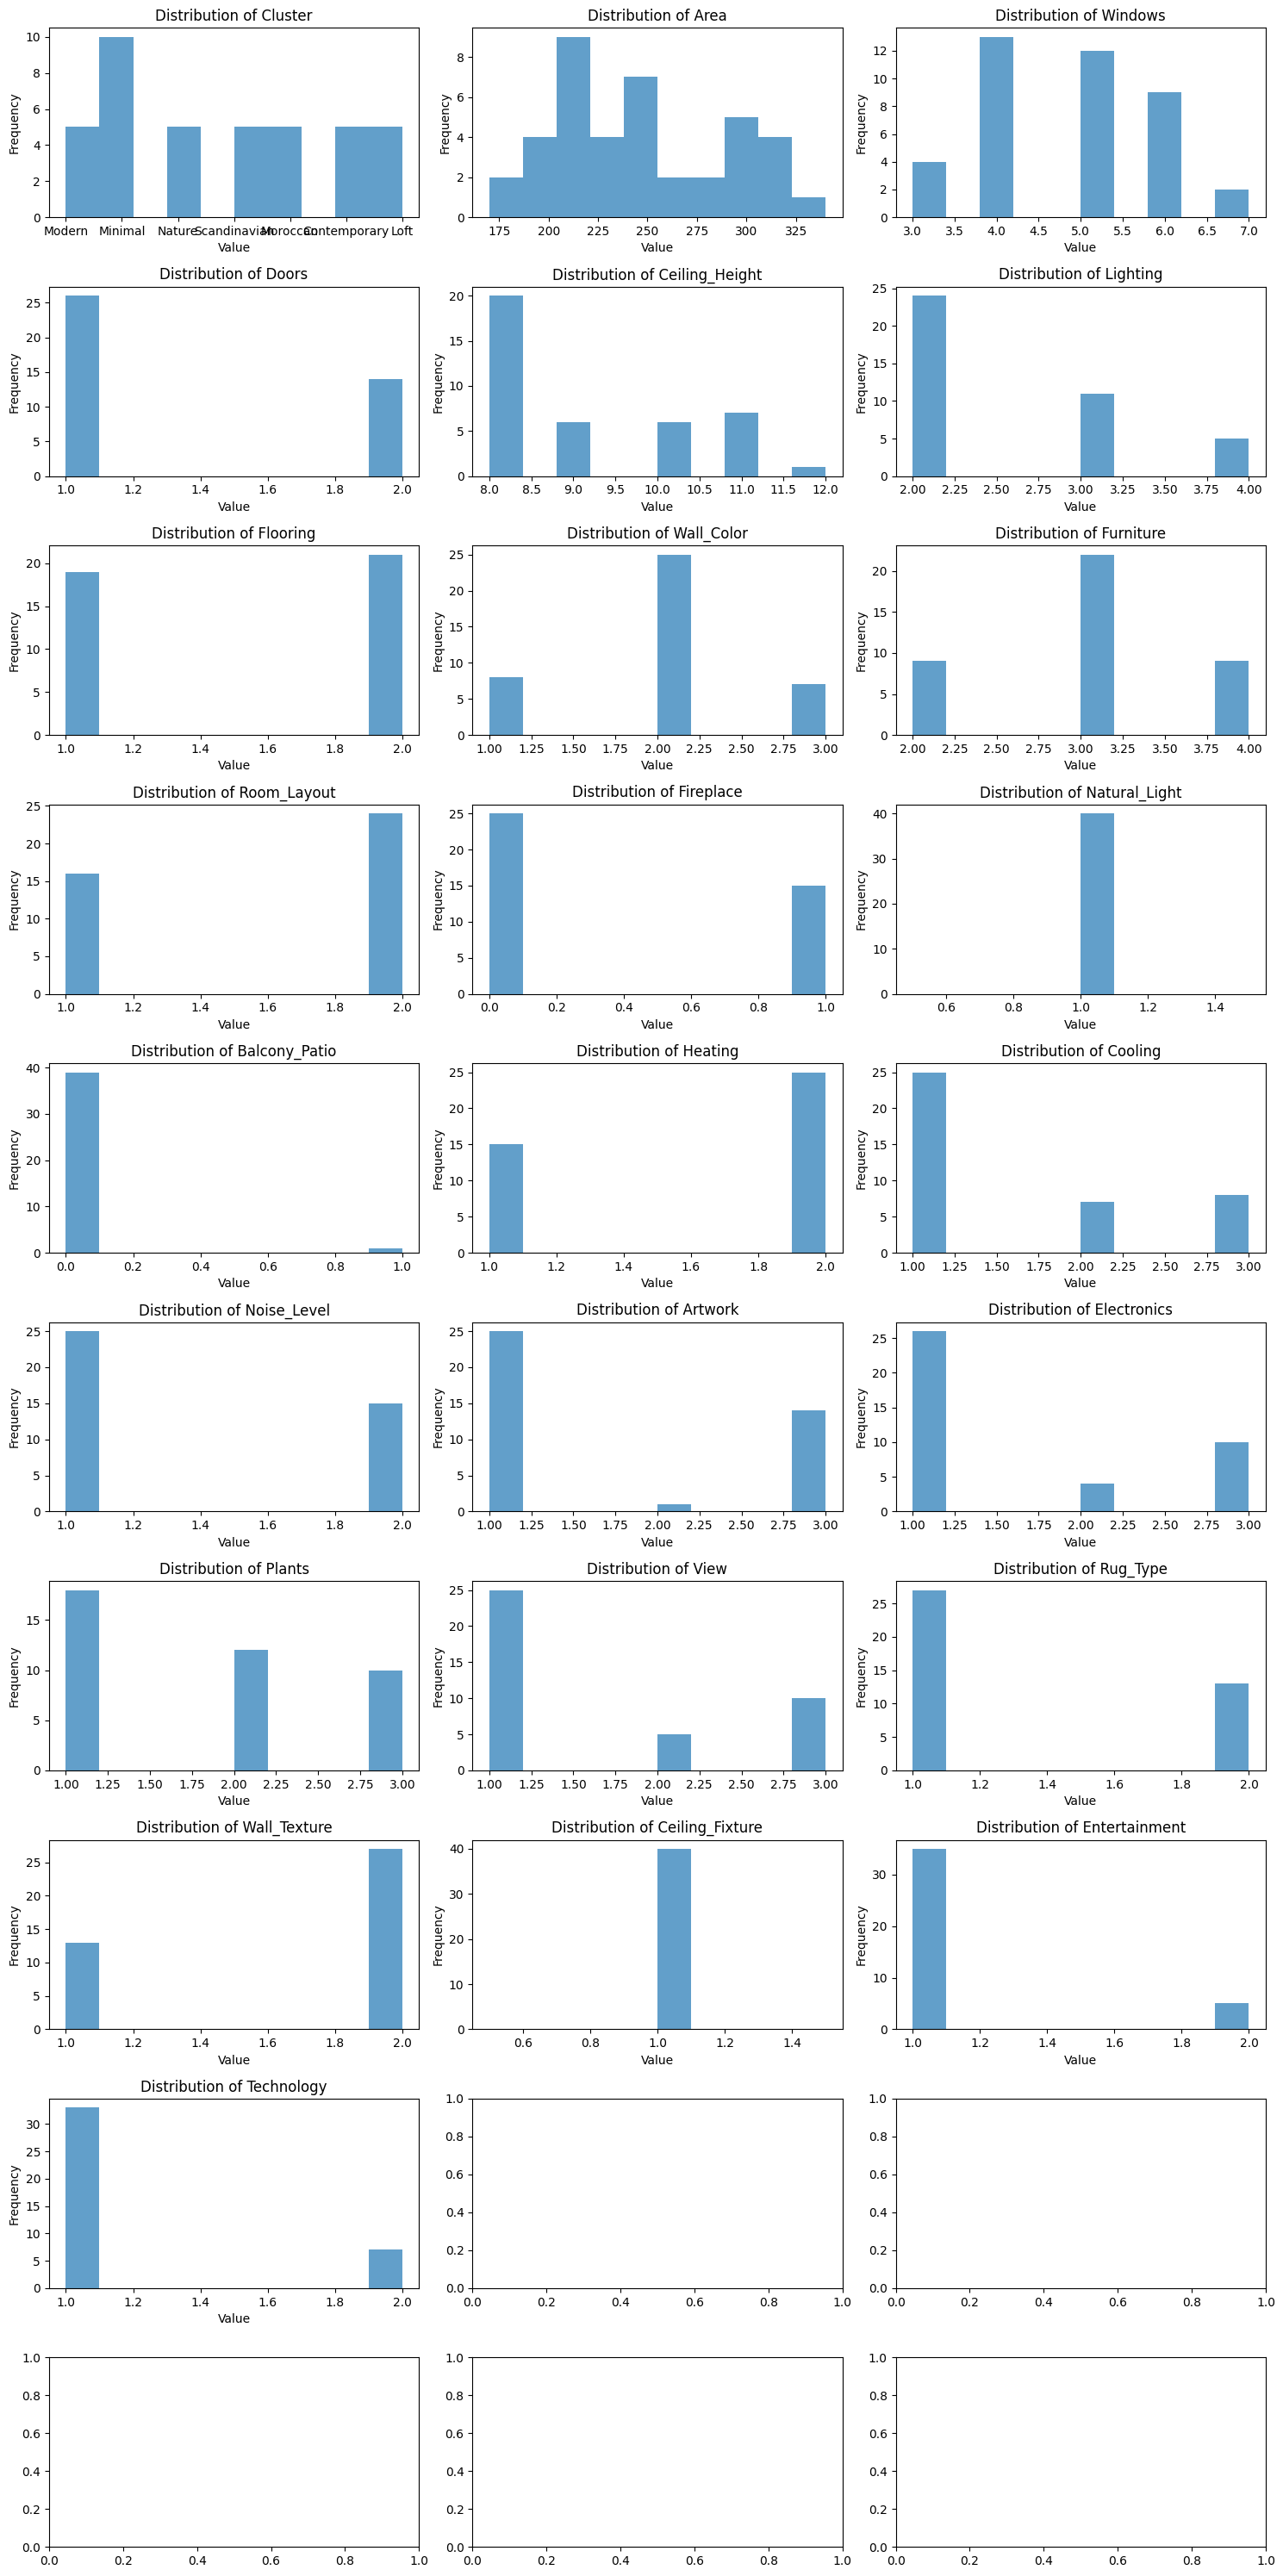

In [15]:
# Set up subplots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))
axes = axes.flatten()

# Plot distribution of each column
for i, column in enumerate(data.columns):
    ax = axes[i]
    ax.hist(data[column], bins=10, alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
y = data['Cluster']
X = data.iloc[:,range(1,25)]

In [17]:
y = data['Cluster']
X = data.iloc[:,range(1,25)]

# Initialize StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df

,Area,Windows,Doors,Ceiling_Height,Lighting,Flooring,Wall_Color,Furniture,Room_Layout,Fireplace,...,Noise_Level,Artwork,Electronics,Plants,View,Rug_Type,Wall_Texture,Ceiling_Fixture,Entertainment,Technology
0,0.064198,0.189832,-0.733799,0.738377,0.672172,-1.051315,0.040859,0.000000,-1.224745,1.290994,...,-0.774597,1.344435,0.464991,0.246183,0.437595,-0.693889,-1.441153,0.0,-0.377964,-0.460566
1,1.698331,2.088148,1.362770,1.536623,2.087270,-1.051315,1.675215,1.490712,-1.224745,1.290994,...,1.290994,1.344435,1.627467,1.477098,1.604515,-0.693889,0.693889,0.0,2.645751,2.171241
2,0.764541,1.138990,1.362770,0.738377,0.672172,-1.051315,0.040859,0.000000,-1.224745,1.290994,...,-0.774597,1.344435,0.464991,0.246183,0.437595,1.441153,-1.441153,0.0,2.645751,-0.460566
3,0.531093,0.189832,1.362770,-0.059868,0.672172,0.951190,1.675215,1.490712,-1.224745,1.290994,...,-0.774597,0.289976,-0.697486,0.246183,0.437595,-0.693889,-1.441153,0.0,-0.377964,-0.460566
4,1.231436,1.138990,1.362770,0.738377,2.087270,-1.051315,0.040859,1.490712,-1.224745,1.290994,...,1.290994,1.344435,1.627467,1.477098,1.604515,1.441153,-1.441153,0.0,-0.377964,2.171241
5,-1.569935,-1.708484,-0.733799,-0.858114,-0.742927,0.951190,-1.593497,-1.490712,0.816497,-0.774597,...,1.290994,-0.764483,-0.697486,0.246183,-0.729325,-0.693889,0.693889,0.0,-0.377964,-0.460566
6,-1.336487,-0.759326,-0.733799,-0.858114,-0.742927,-1.051315,0.040859,-1.490712,0.816497,-0.774597,...,-0.774597,-0.764483,-0.697486,-0.984732,-0.729325,1.441153,-1.441153,0.0,-0.377964,-0.460566
7,-1.103040,-1.708484,-0.733799,-0.858114,-0.742927,0.951190,-1.593497,-1.490712,0.816497,-0.774597,...,1.290994,-0.764483,-0.697486,0.246183,-0.729325,-0.693889,0.693889,0.0,-0.377964,-0.460566
8,-1.803382,-1.708484,-0.733799,-0.858114,-0.742927,-1.051315,0.040859,-1.490712,0.816497,-0.774597,...,-0.774597,-0.764483,-0.697486,-0.984732,-0.729325,-0.693889,0.693889,0.0,-0.377964,-0.460566
9,-0.636145,-0.759326,-0.733799,-0.858114,0.672172,-1.051315,-1.593497,0.000000,-1.224745,-0.774597,...,-0.774597,-0.764483,-0.697486,-0.984732,-0.729325,1.441153,0.693889,0.0,-0.377964,-0.460566


In [48]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_df)

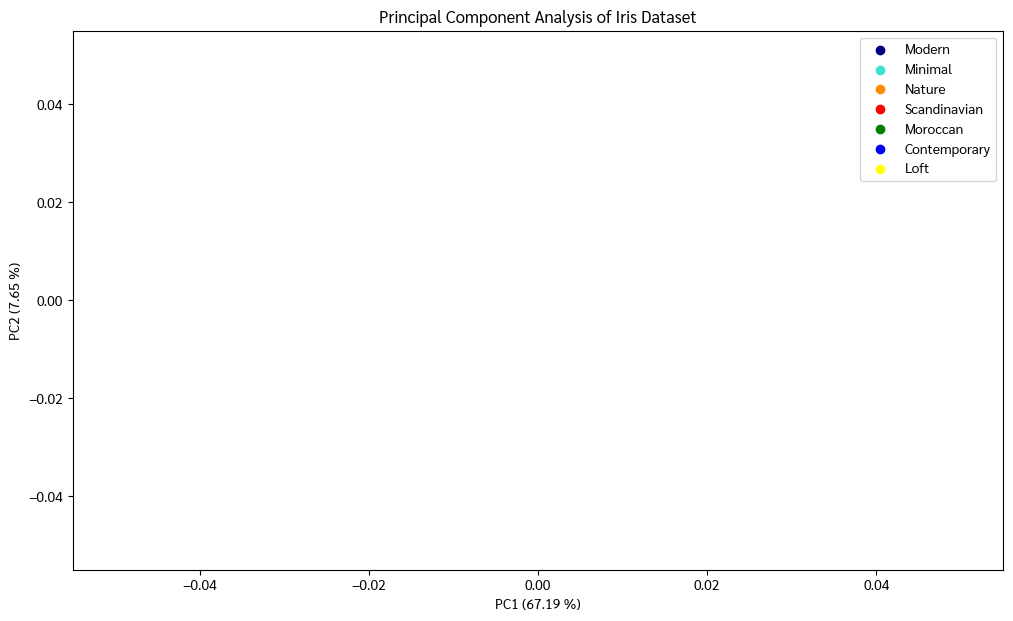

In [53]:
colors = ["navy", "turquoise", "darkorange", "red", "green", "blue","yellow"]
unique_clusters = ['Modern','Minimal','Nature','Scandinavian','Moroccan','Contemporary','Loft']

for X_transformed in [X_pca]:
    plt.figure(figsize=(12, 7))
    for color, i, target_name in zip(colors, [0,1,2,3,4,5,6], unique_clusters):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,

            label=target_name)

        plt.title("Principal Component Analysis" + " of Iris Dataset")
        plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} %)")
        plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} %)")
        plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

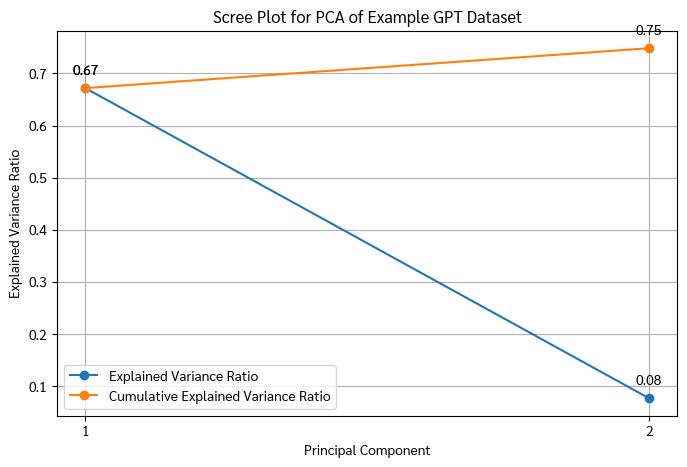

In [60]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='-', label='Explained Variance Ratio')
plt.plot(np.arange(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')

plt.title('Scree Plot for PCA of Example GPT Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_components + 1))
plt.legend()
plt.grid(True)

# Annotate each point with its value
for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), explained_variance_ratio)):
    plt.annotate(f'{explained_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), cumulative_variance_ratio)):
    plt.annotate(f'{cumulative_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


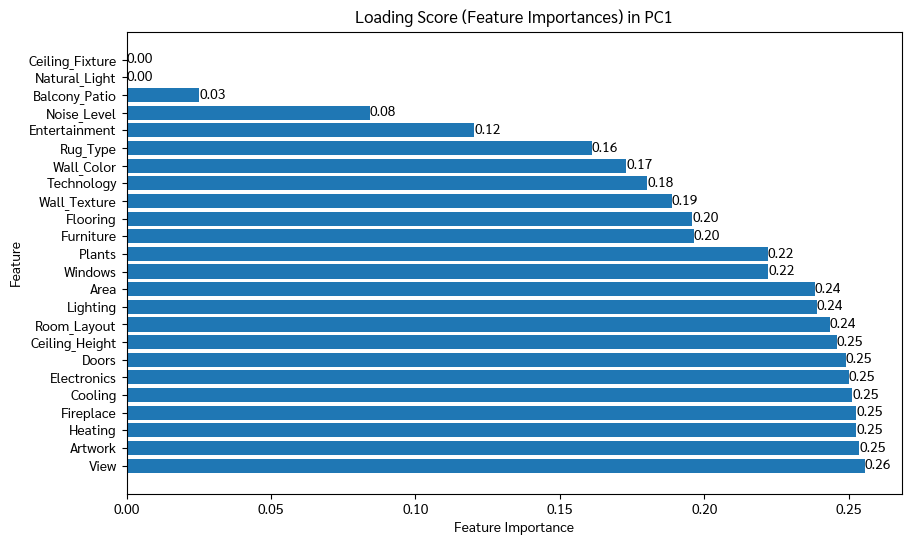

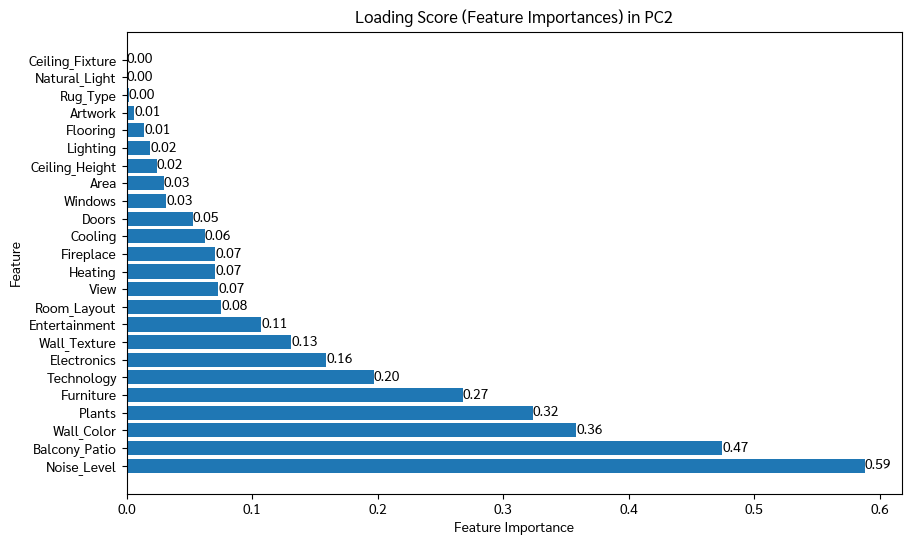

In [61]:
def plot_feature_importances(importances, feature_names, title):
    plt.figure(figsize=(10, 6))
    sorted_idx = importances.argsort()[::-1]
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    
    # Annotate each bar with its value
    for i, v in enumerate(importances[sorted_idx]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')
    plt.show()

# Get feature importances (absolute values of PCA components)
feature_importances = np.abs(pca.components_)

# Plot feature importances for each principal component
for i in range(n_components):
    plot_feature_importances(feature_importances[i], X.columns, f'Loading Score (Feature Importances) in PC{i+1}')


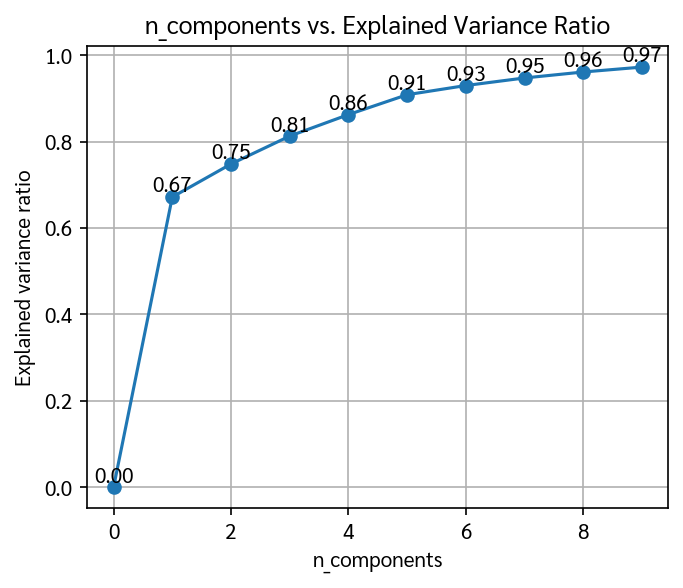

In [79]:
nums = range(10)

var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_df)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(5, 4), dpi=150)
plt.grid()
plt.plot(nums, var_ratio, marker='o')

# Annotate each point with its value
for i, txt in enumerate(var_ratio):
    plt.text(nums[i], var_ratio[i], f'{txt:.2f}', ha='center', va='bottom')

plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

plt.show()